In [1]:
# Initialize the board with 100 squares
board = [{"ladder": None, "snake": None, "player": False} for _ in range(100)]

# Define the ladders with their start and end positions
ladders = {3: 45, 9: 33, 20: 39, 42: 59, 45: 55, 51: 69, 59: 61, 69: 95, 64: 77}

# Define the snakes with their start and end positions
snakes = {31: 7, 35: 15, 39: 25, 34: 27, 50: 31, 67: 35, 63: 44, 97: 63, 89: 73}

# Update the board with ladders and snakes
for square, destination in ladders.items():
    board[square - 1]["ladder"] = destination

for square, destination in snakes.items():
    board[square - 1]["snake"] = destination

# The 'player' key will be set to True for the starting square when the game begins
board[0]["player"] = True



Board representation

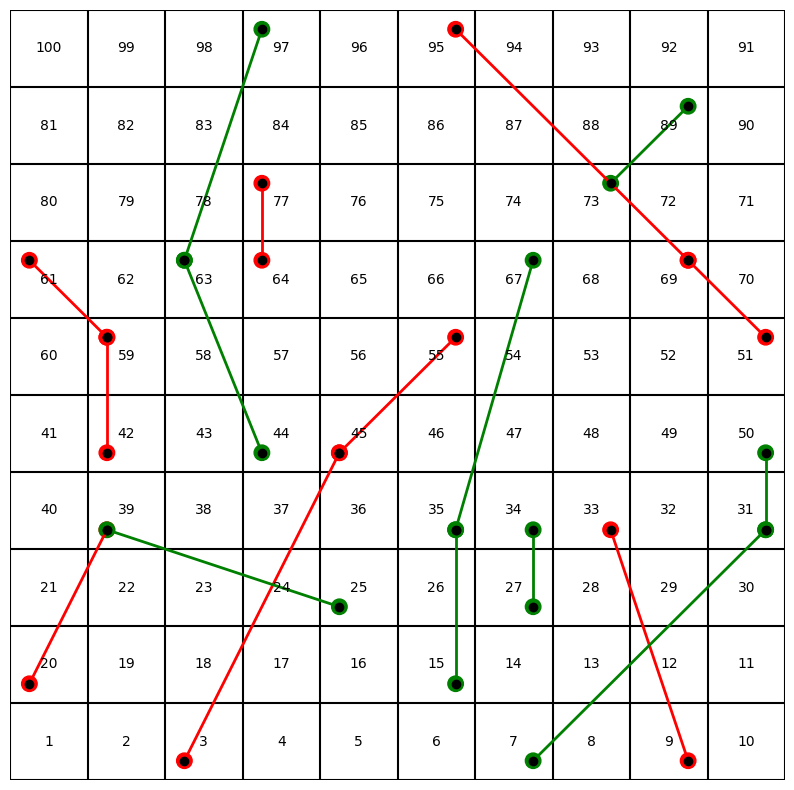

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Adjust the function to offset the ends of the snakes and ladders
def square_to_plot_coordinates_offset(square, board_size, offset_ratio=0.25):
    x = (square - 1) % board_size
    y = (square - 1) // board_size
    # Flip the x coordinate on even rows
    if y % 2 == 1:
        x = board_size - 1 - x
    # Offset the x and y coordinates
    x = x + offset_ratio if x < board_size // 2 else x + (1 - offset_ratio)
    y = y + offset_ratio if y < board_size // 2 else y + (1 - offset_ratio)
    return x, y

# Redraw the game board with the adjusted coordinates
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the game board grid
for x in range(11):
    ax.plot([x, x], [0, 10], 'k-')
    ax.plot([0, 10], [x, x], 'k-')

# Annotate the squares with numbers
for i in range(1, 101):
    x, y = square_to_plot_coordinates_offset(i, 10, 0.5)  # Center text in square
    ax.text(x, y, str(i), va='center', ha='center')

# Draw the ladders and snakes
for path in [ladders, snakes]:
    color = 'g' if path is ladders else 'r'
    for start, end in path.items():
        start_x, start_y = square_to_plot_coordinates_offset(start, 10)
        end_x, end_y = square_to_plot_coordinates_offset(end, 10)
        
        # Draw the line for the snake or ladder
        ax.plot([start_x, end_x], [start_y, end_y], color + '-', linewidth=2)
        
        # Draw dots at the start and end positions
        ax.plot(start_x, start_y, 'ko')  # Black dot at the start
        ax.plot(end_x, end_y, 'ko')  # Black dot at the end
        
        # Add a patch to make the start and end more prominent
        ax.add_patch(patches.Circle((start_x, start_y), 0.1, color=color))
        ax.add_patch(patches.Circle((end_x, end_y), 0.1, color=color))

# Set the axis limits and hide the axes
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Show the plot
plt.show()

Play a game

In [3]:
def play_game(dice_rolls, board):
    # Starting square
    current_square = 1

    # Process each dice roll
    for i, roll in enumerate(dice_rolls):
        # Calculate the next square based on the dice roll
        next_square = current_square + roll

        # Check if the next square would go beyond 100 and bounce back if necessary
        if next_square > 100:
            next_square = 100 - (next_square - 100)

        # Move the player to the next square
        current_square = next_square

        # Check for ladders or snakes at the new position and keep climbing or sliding until there are no more
        moved = True
        while moved:
            moved = False
            if board[current_square - 1]["ladder"] is not None:
                current_square = board[current_square - 1]["ladder"]
                moved = True
            elif board[current_square - 1]["snake"] is not None:
                current_square = board[current_square - 1]["snake"]
                moved = True

        # Check for a win
        if current_square == 100:
            return f"You won after {i+1} throwings!"

    # Return the final square if the player hasn't won yet
    return f"Ending square after the sequence: {current_square}"


In [4]:
dice_rolls = [2, 4, 2]
final_square_or_win_message = play_game(dice_rolls, board)
print(final_square_or_win_message)

Ending square after the sequence: 44


Random games

In [5]:
import random
import numpy as np

# Set seed
random.seed(123)

# Assume board is already defined with 'ladder' and 'snake' keys
# Define the simulation function that captures both total throws and average dice roll
def simulate_games(nsim, board):
    simulation_results = []
    total_throws_list = []
    average_dice_rolls_list = []
    
    for _ in range(nsim):
        total_throws = 0
        dice_rolls_sum = 0
        current_square = 1

        while current_square < 100:
            roll = random.randint(1, 6)
            total_throws += 1
            dice_rolls_sum += roll

            # Bounce back if roll goes past 100
            if current_square + roll > 100:
                current_square = 200 - (current_square + roll)
            else:
                current_square += roll

            # Check for ladders or snakes
            while True:
                if board[current_square - 1]["ladder"] is not None:
                    current_square = board[current_square - 1]["ladder"]
                elif board[current_square - 1]["snake"] is not None:
                    current_square = board[current_square - 1]["snake"]
                else:
                    break

            # Check for a win
            if current_square == 100:
                break

        # Save the results for the histogram
        simulation_results.append(total_throws)
        # Save total throws and average dice roll for scatter plot
        average_dice_roll = dice_rolls_sum / total_throws
        total_throws_list.append(total_throws)
        average_dice_rolls_list.append(average_dice_roll)

    return simulation_results, total_throws_list, average_dice_rolls_list

# Perform the simulations
nsim = 123456  # Adjust the number of simulations if needed
histogram_data, total_throws_data, average_dice_data = simulate_games(nsim, board)

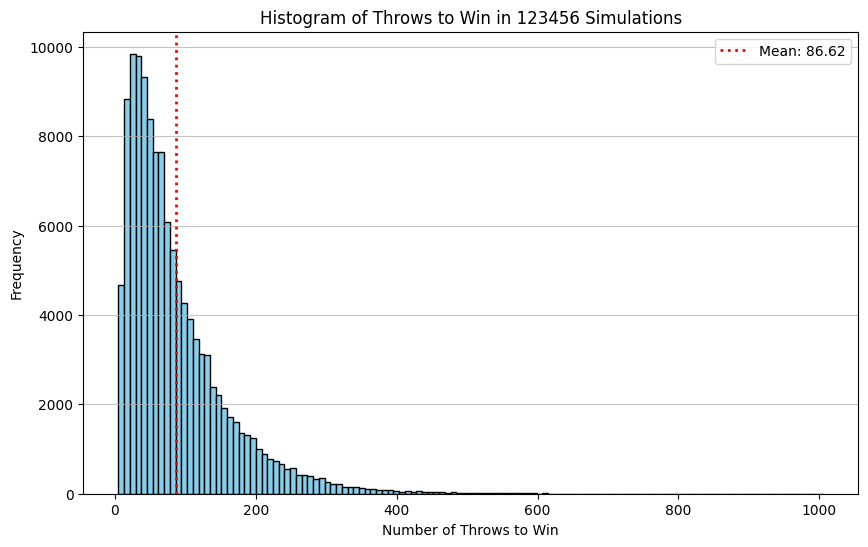

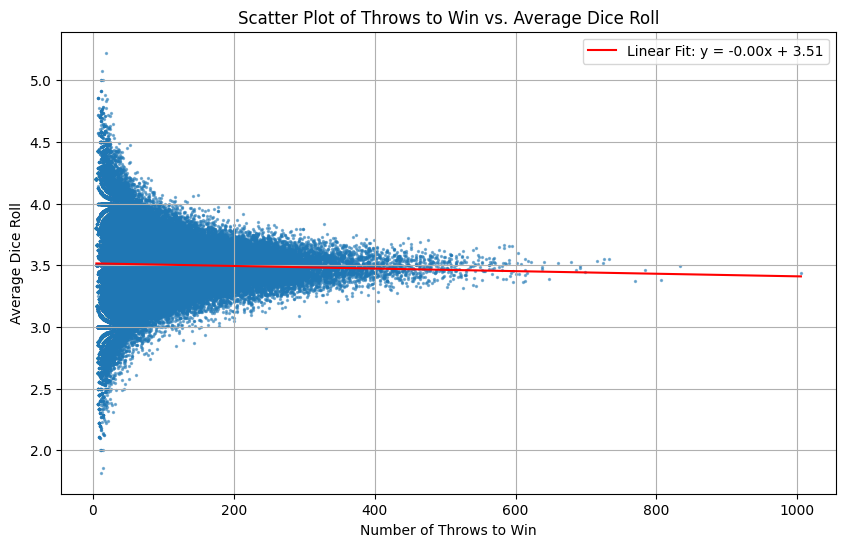

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of the results
plt.figure(figsize=(10, 6))
min_throws = min(histogram_data)
max_throws = max(histogram_data)
mean_throws = np.mean(histogram_data)  # Calculate the mean of histogram data

# Plotting the histogram
plt.hist(histogram_data, bins= nsim//1000, color='skyblue', edgecolor='black')

# Adding a red dotted line for the mean
plt.axvline(mean_throws, color='red', linestyle='dotted', linewidth=2, label=f'Mean: {mean_throws:.2f}')

plt.title(f"Histogram of Throws to Win in {nsim} Simulations")
plt.xlabel('Number of Throws to Win')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Scatterplot of the results
plt.figure(figsize=(10, 6))
plt.scatter(total_throws_data, average_dice_data, alpha=0.5, s=2)  # Small points

# Fit and plot a regression line
m, b = np.polyfit(total_throws_data, average_dice_data, 1)
plt.plot(np.unique(total_throws_data), m*np.unique(total_throws_data) + b, color='red', label=f'Linear Fit: y = {m:.2f}x + {b:.2f}')

plt.title('Scatter Plot of Throws to Win vs. Average Dice Roll')
plt.xlabel('Number of Throws to Win')
plt.ylabel('Average Dice Roll')
plt.legend()
plt.grid(True)
plt.show()


Cheating comes into place 

In [7]:
# Redefine the simulate_game_with_cheating function here
def simulate_game_with_cheating(board, cheating=None):
    total_throws = 0
    dice_rolls_sum = 0  # Sum of dice rolls to calculate the average
    current_square = 1

    # If cheating is enabled, adjust the probability distribution of the dice rolls
    if cheating in range(1, 7):
        # The cheating dice has double the probability for the cheating number
        dice_possibilities = list(range(1, 7)) + [cheating]
    else:
        dice_possibilities = range(1, 7)

    while current_square < 100:
        roll = random.choice(dice_possibilities)
        total_throws += 1
        dice_rolls_sum += roll

        # Move the player according to the dice roll
        if current_square + roll <= 100:
            current_square += roll

        # Check for ladders or snakes
        moved = True
        while moved:
            moved = False
            if board[current_square - 1]["ladder"] is not None:
                current_square = board[current_square - 1]["ladder"]
                moved = True
            elif board[current_square - 1]["snake"] is not None:
                current_square = board[current_square - 1]["snake"]
                moved = True

    average_dice_roll = dice_rolls_sum / total_throws
    return total_throws, average_dice_roll


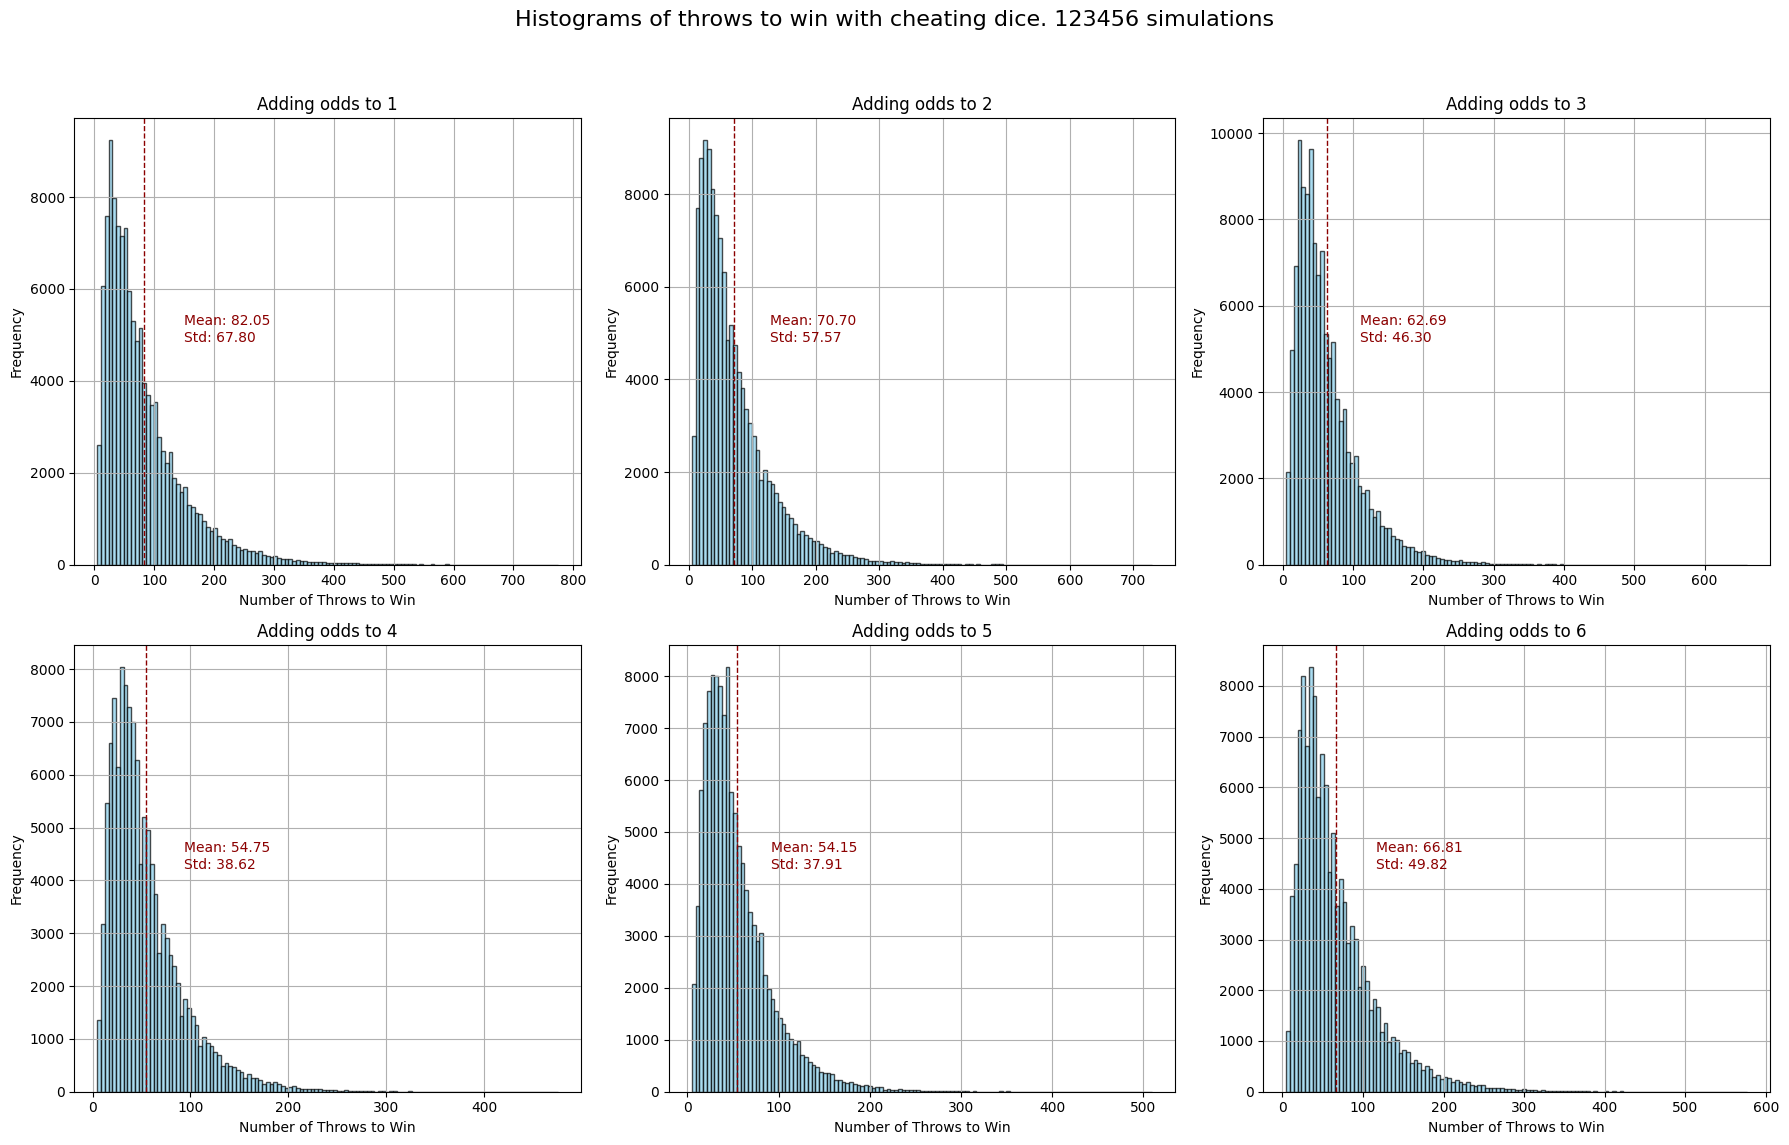

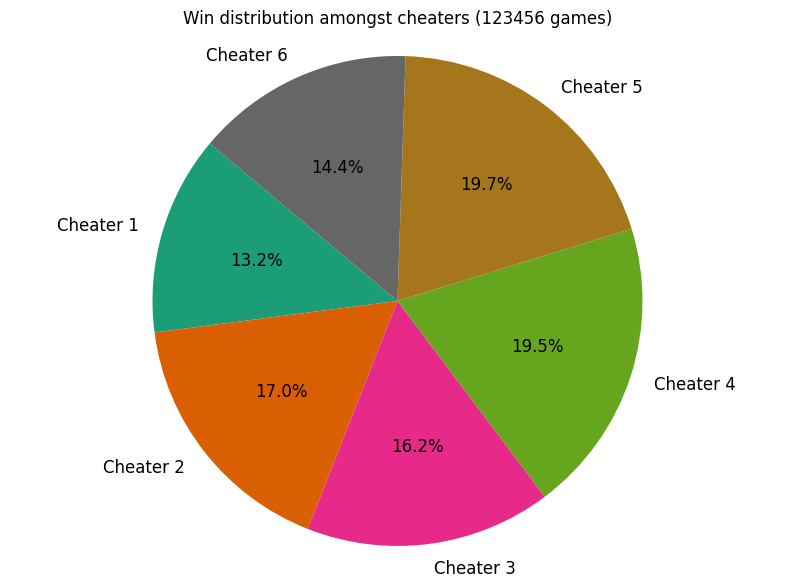

In [8]:
# Initialize win counts for each cheater
win_counts = {cheater: 0 for cheater in range(1, 7)}
# Store all throws for histogram data
all_throws = {cheater: [] for cheater in range(1, 7)}

# Simulate the games
for _ in range(nsim):
    game_results = []
    final_throws = []
    for cheating_number in range(1, 7):
        throws_to_win, _ = simulate_game_with_cheating(board, cheating=cheating_number)
        game_results.append(throws_to_win)
        all_throws[cheating_number].append(throws_to_win)

    min_throws = min(game_results)
    winners = [i for i, throws in enumerate(game_results, 1) if throws == min_throws]

    if len(winners) < 6:  # If not all players tied, allow subsequent players to make a last throw
        for cheating_number in range(1, 7):
            if cheating_number not in winners:
                _, avg_dice = simulate_game_with_cheating(board, cheating=cheating_number)
                final_throws.append((cheating_number, game_results[cheating_number-1] + 1, avg_dice))  # Adding one more throw
        
        # Check if any of the final throws resulted in a win
        for cheating_number, final_throw, _ in final_throws:
            if final_throw <= min_throws:
                winners.append(cheating_number)

    # Randomly select a winner among those who either won first or caught up with the last throw
    winner = random.choice(winners)
    win_counts[winner] += 1

# Plotting the histograms
fig, axs = plt.subplots(2, 3, figsize=(18, 12), dpi=100)
fig.suptitle(f"Histograms of throws to win with cheating dice. {nsim} simulations", fontsize=16)

for i, cheating_number in enumerate(range(1, 7)):
    total_throws = all_throws[cheating_number]
    mean_throws = np.mean(total_throws)
    std_throws = np.std(total_throws)
    ax = axs[i // 3, i % 3]

    # Histogram plot
    ax.hist(total_throws, bins=nsim//1000, color='skyblue', edgecolor='black', alpha=0.7)
    # Plot a vertical line for the mean and annotate the mean and standard deviation
    ax.axvline(mean_throws, color='darkred', linestyle='dashed', linewidth=1)
    ax.text(mean_throws + std_throws, max(ax.get_ylim())/2, f'Mean: {mean_throws:.2f}\nStd: {std_throws:.2f}', color='darkred')

    ax.set_title(f'Adding odds to {cheating_number}')
    ax.set_xlabel('Number of Throws to Win')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting the pie chart
labels = [f'Cheater {i}' for i in win_counts.keys()]
sizes = win_counts.values()
colors = plt.cm.Dark2(np.linspace(0, 1, 6))

plt.figure(figsize=(10, 7), dpi=100)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, textprops={'fontsize': 12})
plt.title(f'Win distribution amongst cheaters ({nsim} games)')
plt.axis('equal')
plt.show()